In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input"))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['crack-identification-ce784a-2020-iitk']


#### Importing necessary libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random

#### Directories in kaggle

In [ ]:
train_dir = '../input/crack-identification-ce784a-2020-iitk/train'
os.listdir(train_dir)

['cracked', 'uncracked']

In [ ]:
train_dir_cracked = '../input/crack-identification-ce784a-2020-iitk/train/cracked'
train_dir_uncracked = '../input/crack-identification-ce784a-2020-iitk/train/uncracked'
test_dir = '../input/crack-identification-ce784a-2020-iitk/test'
train_cracked = []
for i in os.listdir(train_dir_cracked) :
    train_cracked.append('../input/crack-identification-ce784a-2020-iitk/train/cracked/' + i)
    
train_uncracked = []
for i in os.listdir(train_dir_uncracked) :
    train_uncracked.append('../input/crack-identification-ce784a-2020-iitk/train/uncracked/' + i)
    
test_images = []
for i in os.listdir(test_dir) :
    test_images.append('../input/crack-identification-ce784a-2020-iitk/test/' + i)
## Creating seperate lists of cracked,uncracked and test images paths.
train_cracked_sub = train_cracked[:]
train_uncracked_sub = train_uncracked[:]
test_images_sub = test_images[:]

#### Some examples

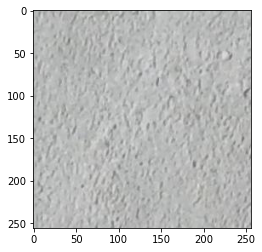

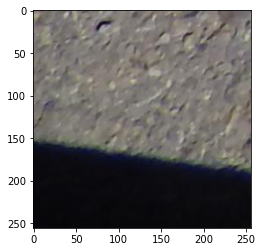

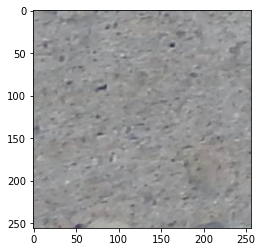

In [ ]:
import matplotlib.image as mpimage
for img in test_images_sub[:3] :
    img = mpimage.imread(img)
    implot = plt.imshow(img)
    plt.show()


In [ ]:
### Target dimensions of the images
nrows = 150
ncols = 150
channels = 3

In [ ]:
### Reading images as matrix (coloured images)
def process_image_cracked(images) :
    x,y = [],[]
    for img in images :
        x.append(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR),(nrows,ncols), interpolation = cv2.INTER_CUBIC))
        y.append(1)
    return x,y

def process_image_uncracked(images) :
    x,y = [],[]
    for img in images :
        x.append(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR),(nrows,ncols), interpolation = cv2.INTER_CUBIC))
        y.append(0)
    return x,y

In [ ]:
## Processing the images
x_cracked,y_cracked = process_image_cracked(train_cracked_sub)
x_uncracked,y_uncracked = process_image_uncracked(train_uncracked_sub)

In [ ]:
len(x_cracked)

7501

In [ ]:
### Creating target values and merging the two datasets
cracked_all = []
for i in range(len(x_cracked)) :
    cracked_all.append([x_cracked[i],y_cracked[i]])

In [ ]:
for i in range(len(x_uncracked)) :
    cracked_all.append([x_uncracked[i],y_uncracked[i]])

In [ ]:
len(cracked_all)

14968

In [ ]:
### Shuffling the datasets
random.shuffle(cracked_all)

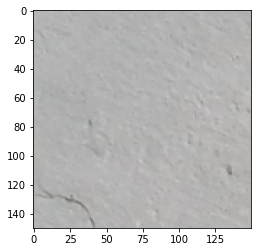

In [ ]:
img = cracked_all[333][0]
implot = plt.imshow(img)
plt.show()

In [ ]:
cracked_all[333][1]

1

In [ ]:
x = np.array([i[0] for i in cracked_all])

In [ ]:
y = np.array([i[1] for i in cracked_all])

In [ ]:
len(y)

14968

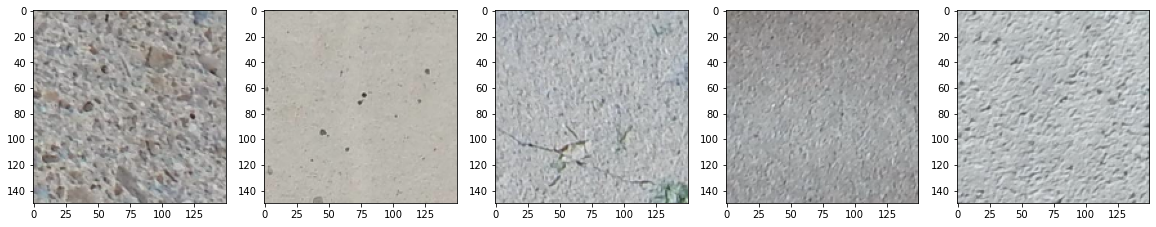

In [ ]:
### Plotting some figures
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns) :
    plt.subplot(5/columns + 1,columns,i+1)
    plt.imshow(x[i])

Text(0.5, 1.0, 'Labels of cracked and uncracked')

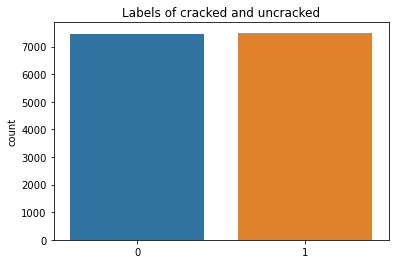

In [ ]:
### Plotting counts of cracked and uncracked datasets (Balanced dataset)
import seaborn as sns
x = np.array(x)
y = np.array(y)
sns.countplot(y)
plt.title('Labels of cracked and uncracked')

In [ ]:
print(x.shape)
print(y.shape)

(14968, 150, 150, 3)
(14968,)


In [ ]:
### Splitting the data sets into train and validation in 80-20 ratio
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.20,random_state = 2)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(11974, 150, 150, 3)
(11974,)
(2994, 150, 150, 3)
(2994,)


In [ ]:
n_train = len(x_train)
n_val = len(x_val)
batch_size = 32

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,load_img

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

##### Defining the CNN xception model and downloading the pretrained model from keras

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

base_model.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
### Training and validation data generator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow(x_train,y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_val,y_val, batch_size = batch_size)

#### Training the model in 23 steps (More steps leads to overfitting)

In [ ]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = n_train//batch_size,
                             epochs = 23,
                             validation_data = val_generator,
                             validation_steps = n_val//batch_size,)

Epoch 1/23
374/374 [==============================] - 114s 304ms/step - loss: 0.5190 - binary_accuracy: 0.7171 - val_loss: 0.4045 - val_binary_accuracy: 0.8320
Epoch 2/23
374/374 [==============================] - 111s 298ms/step - loss: 0.4385 - binary_accuracy: 0.7870 - val_loss: 0.3679 - val_binary_accuracy: 0.8327
Epoch 3/23
374/374 [==============================] - 113s 302ms/step - loss: 0.4099 - binary_accuracy: 0.8028 - val_loss: 0.3525 - val_binary_accuracy: 0.8461
Epoch 4/23
374/374 [==============================] - 113s 301ms/step - loss: 0.3980 - binary_accuracy: 0.8061 - val_loss: 0.3477 - val_binary_accuracy: 0.8592
Epoch 5/23
374/374 [==============================] - 113s 301ms/step - loss: 0.3870 - binary_accuracy: 0.8148 - val_loss: 0.3265 - val_binary_accuracy: 0.8548
Epoch 6/23
374/374 [==============================] - 112s 299ms/step - loss: 0.3744 - binary_accuracy: 0.8241 - val_loss: 0.3420 - val_binary_accuracy: 0.8639
Epoch 7/23
374/374 [====================

In [ ]:
## Save the model
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

#### Plotting the accuracy and losses for train and validation data

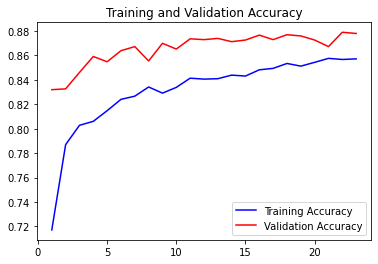

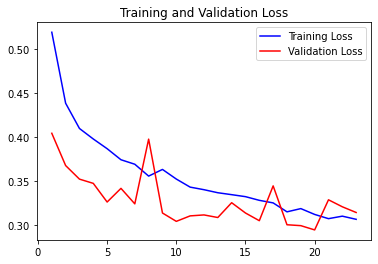

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'b',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'r',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'b',label = 'Training Loss')
plt.plot(epochs,val_loss,'r',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

####Processing public test images

In [ ]:
x_test,y_test = process_image_cracked(test_images_sub)
x = np.array(x_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
len(x_test)

2000

#### Creating prediction in a list

In [ ]:
labels = []
for i in range(len(x)) :
    temp = list(x[i])
    temp = np.divide(temp,255)
    temp = np.array([temp])
    pred = model.predict(temp)
    if pred > 0.5 :
        labels.append('cracked')
    else :
        labels.append('uncracked')
print(len(labels))

In [ ]:
### For file name, splitting the path
file = []
for i in range(len(labels)) :
    l = list(test_images_sub[i].split('/'))
    file.append(l[-1])
print(len(file))

In [ ]:
np.shape(file)

In [ ]:
## Creating a dataframe
df = pd.DataFrame(columns = ['filename','class'])

In [ ]:
df

In [ ]:
df['filename'] = file
df['class'] = labels

In [ ]:
df

In [ ]:
### Sorting the dataframe in order of filename
col = []
for i in range(len(df)) :
    temp = df.iloc[i]['filename']
    temp = list(temp.split('.'))
    col.append(int(temp[0]))
df['sort'] = col
df

In [ ]:
df = df.sort_values(by = ['sort'],ignore_index = True)
df

In [ ]:
del df['sort']

In [ ]:
df

#### Exporting the dataframe into a csv file without indexes

In [ ]:
df.to_csv('submission.csv',index = False)